In this assignment, you'll continue working with the house prices data. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Reimplement your model from the previous lesson.

In [3]:
house_price = pd.DataFrame()
house_price = house_prices_df[['MSSubClass', 'MSZoning','LotArea','Street','LotShape','Neighborhood','BldgType','GrLivArea',
                               'OverallQual','YearBuilt','RoofStyle', 'HouseStyle' ,'TotalBsmtSF', 'Heating','TotRmsAbvGrd',
                               'Fireplaces','GarageCars','PoolArea', 'YrSold', 'SaleType','SaleCondition','FullBath',
                               'SalePrice']]

In [4]:
for col in house_price.select_dtypes(include='object'):
    df = pd.DataFrame(house_price[col].unique())
    df.columns = [col]
    for i in house_price[col].unique():
        house_price.loc[house_price[col] == i , col+'_num'] = df[df[col] == i ].index[0]

In [5]:
house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'Neighborhood', 'BldgType', 'GrLivArea', 'OverallQual', 'YearBuilt',
       'RoofStyle', 'HouseStyle', 'TotalBsmtSF', 'Heating', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold', 'SaleType',
       'SaleCondition', 'FullBath', 'SalePrice', 'MSZoning_num', 'Street_num',
       'LotShape_num', 'Neighborhood_num', 'BldgType_num', 'RoofStyle_num',
       'HouseStyle_num', 'Heating_num', 'SaleType_num', 'SaleCondition_num'],
      dtype='object')

In [6]:
Y = house_price['SalePrice']
X = house_price[['GrLivArea','YearBuilt', 'TotalBsmtSF', 'GarageCars','Fireplaces','LotArea','BldgType_num','OverallQual' ,
                 'PoolArea', 'YrSold' , 'Heating_num']]

In [7]:
X_train , X_test, Y_train , Y_test = train_test_split(X , Y ,test_size = 0.2 , random_state = 465)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1168, 11)
(292, 11)
(1168,)
(292,)


- Try OLS, Lasso, Ridge and ElasticNet regressions using the same model specification. This time, you need to do k-fold cross-validation to choose the best hyperparameter values for your models. Which model is the best? Why?

In [9]:
lrm = LinearRegression().fit(X_train , Y_train)

In [10]:
print("train set R-squared : {}".format(lrm.score(X_train , Y_train)))
print("test set R-squared  : {}".format(lrm.score(X_test , Y_test)))

train set R-squared : 0.793044443387863
test set R-squared  : 0.6638277150463111


In [11]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)
print("TRAİN SET")
print("mean absolute error            : {}".format(mean_absolute_error(Y_train , y_preds_train)))
print("mean squared error             : {}".format(mse(Y_train , y_preds_train)))
print("root mean squared error        : {}".format(rmse(Y_train , y_preds_train)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_train - y_preds_train) / Y_train)) * 100))
print("TEST SET")
print("mean absolute error            : {}".format(mean_absolute_error(Y_test , y_preds_test)))
print("mean squared error             : {}".format(mse(Y_test , y_preds_test)))
print("root mean squared error        : {}".format(rmse(Y_test , y_preds_test)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

TRAİN SET
mean absolute error            : 23077.635944497324
mean squared error             : 1256082458.4919229
root mean squared error        : 35441.25362472274
mean absolute percentage error : 13.81778344250325
TEST SET
mean absolute error            : 28177.010763418682
mean squared error             : 2435691511.163053
root mean squared error        : 49352.725468438446
mean absolute percentage error : 15.964610260515846


In [12]:
lrm = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=1111)
pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, Y_train = X.iloc[train_indeks], Y.iloc[train_indeks]
    X_test, Y_test = X.iloc[test_indeks], Y.iloc[test_indeks]
    
    lrm.fit(X_train, Y_train)
    
    prediction = lrm.predict(X_test)
    
    score = lrm.score(X_test, Y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23)

Piece No.1 score: 0.837
-----------------------
Piece No.2 score: 0.793
-----------------------
Piece No.3 score: 0.544
-----------------------
Piece No.4 score: 0.827
-----------------------
Piece No.5 score: 0.814
-----------------------


In [13]:
from sklearn.linear_model import Ridge

In [14]:
score = []
for i in range(0,10):  
    ridgeregr = Ridge(alpha = 10 ** i)
    ridgeregr.fit(X_train , Y_train)
    score.append([i , ridgeregr.score(X_train , Y_train) , ridgeregr.score(X_test , Y_test)])


In [15]:
score = pd.DataFrame(score , columns=['alpha' , 'train' , 'test'])

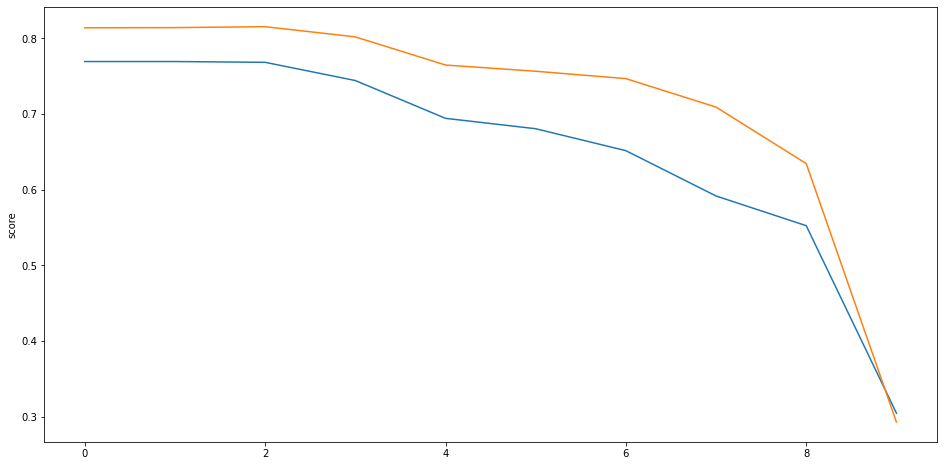

In [16]:
plt.figure(figsize=(16,8))
plt.plot(score['alpha'] , score['train'])
plt.plot(score['alpha'] , score['test'])
plt.ylabel("score")
plt.show()

In [17]:
ridgeregr = Ridge(alpha = 10 ** 2)
ridgeregr.fit(X_train , Y_train)

Ridge(alpha=100)

In [18]:
print("train set R-squared : {}".format(ridgeregr.score(X_train , Y_train)))
print("test set R-squared  : {}".format(ridgeregr.score(X_test , Y_test)))

train set R-squared : 0.7682192939935927
test set R-squared  : 0.8153205191602524


In [19]:
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)
print("TRAİN SET")
print("mean absolute error            : {}".format(mean_absolute_error(Y_train , y_preds_train)))
print("mean squared error             : {}".format(mse(Y_train , y_preds_train)))
print("root mean squared error        : {}".format(rmse(Y_train , y_preds_train)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_train - y_preds_train) / Y_train)) * 100))
print("TEST SET")
print("mean absolute error            : {}".format(mean_absolute_error(Y_test , y_preds_test)))
print("mean squared error             : {}".format(mse(Y_test , y_preds_test)))
print("root mean squared error        : {}".format(rmse(Y_test , y_preds_test)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

TRAİN SET
mean absolute error            : 22759.17586884294
mean squared error             : 1364615427.5262613
root mean squared error        : 36940.701502898686
mean absolute percentage error : 13.20841509772979
TEST SET
mean absolute error            : 24192.252587698265
mean squared error             : 1465893907.0320256
root mean squared error        : 38286.99396703828
mean absolute percentage error : 14.314977820231608


In [20]:
ridgeregr = Ridge(alpha = 10 ** 2)

kf = KFold(n_splits=5, shuffle=True, random_state=1111)
pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, Y_train = X.iloc[train_indeks], Y.iloc[train_indeks]
    X_test, Y_test = X.iloc[test_indeks], Y.iloc[test_indeks]
    
    ridgeregr.fit(X_train, Y_train)
    
    prediction = ridgeregr.predict(X_test)
    
    score = ridgeregr.score(X_test, Y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23)

Piece No.1 score: 0.839
-----------------------
Piece No.2 score: 0.794
-----------------------
Piece No.3 score: 0.533
-----------------------
Piece No.4 score: 0.831
-----------------------
Piece No.5 score: 0.815
-----------------------


In [21]:
from sklearn.linear_model import Lasso

In [22]:
score = []
for i in range(0,10):  
    lassoregr = Lasso(alpha = 10 ** i)
    lassoregr.fit(X_train , Y_train)
    score.append([i , lassoregr.score(X_train , Y_train) , lassoregr.score(X_test , Y_test)])

In [23]:
score = pd.DataFrame(score , columns=['alpha' , 'train' , 'test'])

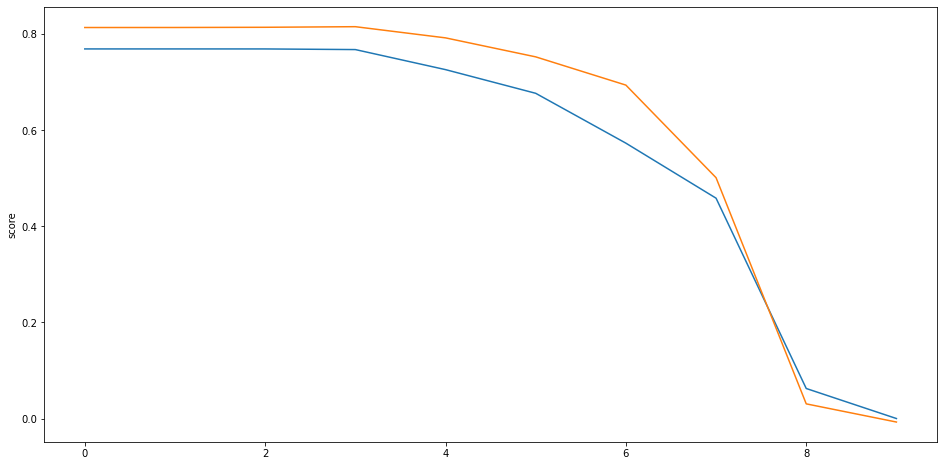

In [24]:
plt.figure(figsize=(16,8))
plt.plot(score['alpha'] , score['train'])
plt.plot(score['alpha'] , score['test'])
plt.ylabel("score")
plt.show()

In [25]:
lassoregr = Lasso(alpha = 10 ** 3)
lassoregr.fit(X_train , Y_train)

Lasso(alpha=1000)

In [26]:
print("train set R-squared : {}".format(lassoregr.score(X_train , Y_train)))
print("test set R-squared  : {}".format(lassoregr.score(X_test , Y_test)))

train set R-squared : 0.7679095809720675
test set R-squared  : 0.8155449068254075


In [27]:
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)
print("TRAİN SET")
print("mean absolute error            : {}".format(mean_absolute_error(Y_train , y_preds_train)))
print("mean squared error             : {}".format(mse(Y_train , y_preds_train)))
print("root mean squared error        : {}".format(rmse(Y_train , y_preds_train)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_train - y_preds_train) / Y_train)) * 100))
print("TEST SET")
print("mean absolute error            : {}".format(mean_absolute_error(Y_test , y_preds_test)))
print("mean squared error             : {}".format(mse(Y_test , y_preds_test)))
print("root mean squared error        : {}".format(rmse(Y_test , y_preds_test)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

TRAİN SET
mean absolute error            : 22816.545094085974
mean squared error             : 1366438871.6539502
root mean squared error        : 36965.37395528348
mean absolute percentage error : 13.280823866119762
TEST SET
mean absolute error            : 24353.25133568205
mean squared error             : 1464112829.2984934
root mean squared error        : 38263.727331488415
mean absolute percentage error : 14.503390431734243


In [28]:
lassoregr = Lasso(alpha = 10 ** 3)

kf = KFold(n_splits=5, shuffle=True, random_state=1111)
pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, Y_train = X.iloc[train_indeks], Y.iloc[train_indeks]
    X_test, Y_test = X.iloc[test_indeks], Y.iloc[test_indeks]
    
    lassoregr.fit(X_train, Y_train)
    
    prediction = lassoregr.predict(X_test)
    
    score = lassoregr.score(X_test, Y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23)

Piece No.1 score: 0.840
-----------------------
Piece No.2 score: 0.795
-----------------------
Piece No.3 score: 0.529
-----------------------
Piece No.4 score: 0.831
-----------------------
Piece No.5 score: 0.816
-----------------------


In [29]:
from sklearn.linear_model import ElasticNet

In [30]:
score = []
for i in range(-10,10):  
    for j in np.arange(0 , 1 , 0.1):
        elasticregr = ElasticNet(alpha = 10 ** i , l1_ratio = j)
        elasticregr.fit(X_train , Y_train)
        score.append([i , j , elasticregr.score(X_train , Y_train) , elasticregr.score(X_test , Y_test)])

In [31]:
score = pd.DataFrame(score , columns=['alpha', 'l1_ratio' , 'train' , 'test'])

In [32]:
score['fark'] = np.abs(score['train'] - score['test'])

In [33]:
score[(score['train'] > 0.70) & (score['test'] > 0.70)].sort_values(by='fark').head(20)

,alpha,l1_ratio,train,test,fark
9,-10,0.9,0.769263,0.813811,0.044547
8,-10,0.8,0.769263,0.813811,0.044547
7,-10,0.7,0.769263,0.813811,0.044547
6,-10,0.6,0.769263,0.813811,0.044547
5,-10,0.5,0.769263,0.813811,0.044547
4,-10,0.4,0.769263,0.813811,0.044547
3,-10,0.3,0.769263,0.813811,0.044547
2,-10,0.2,0.769263,0.813811,0.044547
1,-10,0.1,0.769263,0.813811,0.044547
0,-10,0.0,0.769263,0.813811,0.044547


In [34]:
elasticregr = ElasticNet(alpha = 10 ** (-10) , l1_ratio = 0.9)
elasticregr.fit(X_train , Y_train)

ElasticNet(alpha=1e-10, l1_ratio=0.9)

In [35]:
print("train set R-squared : {}".format(elasticregr.score(X_train , Y_train)))
print("test set R-squared  : {}".format(elasticregr.score(X_test , Y_test)))

train set R-squared : 0.7692631656358224
test set R-squared  : 0.813810579918628


In [36]:
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)
print("TRAİN SET")
print("mean absolute error            : {}".format(mean_absolute_error(Y_train , y_preds_train)))
print("mean squared error             : {}".format(mse(Y_train , y_preds_train)))
print("root mean squared error        : {}".format(rmse(Y_train , y_preds_train)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_train - y_preds_train) / Y_train)) * 100))
print("TEST SET")
print("mean absolute error            : {}".format(mean_absolute_error(Y_test , y_preds_test)))
print("mean squared error             : {}".format(mse(Y_test , y_preds_test)))
print("root mean squared error        : {}".format(rmse(Y_test , y_preds_test)))
print("mean absolute percentage error : {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

TRAİN SET
mean absolute error            : 23089.080911519348
mean squared error             : 1358469603.8643708
root mean squared error        : 36857.422642723825
mean absolute percentage error : 13.559224055025847
TEST SET
mean absolute error            : 24691.86091005814
mean squared error             : 1477879054.0782547
root mean squared error        : 38443.19255834841
mean absolute percentage error : 14.854863361277468


In [37]:
elasticregr = ElasticNet(alpha = 10 ** (-10) , l1_ratio = 0.9)

kf = KFold(n_splits=5, shuffle=True, random_state=1111)
pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, Y_train = X.iloc[train_indeks], Y.iloc[train_indeks]
    X_test, Y_test = X.iloc[test_indeks], Y.iloc[test_indeks]
    
    elasticregr.fit(X_train, Y_train)
    
    prediction = elasticregr.predict(X_test)
    
    score = elasticregr.score(X_test, Y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23)

Piece No.1 score: 0.837
-----------------------
Piece No.2 score: 0.793
-----------------------
Piece No.3 score: 0.544
-----------------------
Piece No.4 score: 0.827
-----------------------
Piece No.5 score: 0.814
-----------------------


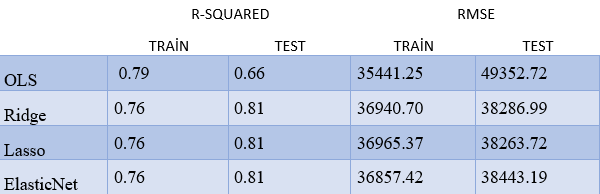

Regularization yöntemleri OLS'ye göre daha iyi sonuçlar verdi.